In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
from matplotlib.gridspec import GridSpec
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter

plt.style.use('/home/gabriele/Desktop/PyCharm_env/mine.mplstyle')
plt.rcParams["axes.axisbelow"] = False

In [3]:
##############################
###   LOAD RELEVANT DATA:  ###
##############################

#File Directory:
files_dir="/home/gabriele/Desktop/JupiterNotebook_projects/phase_shift_paper_plots/files/"

#Main Plots Directory:
main_plots_dir="/home/gabriele/Desktop/JupiterNotebook_projects/phase_shift_paper_plots/main_plots/"


#SBT: N_{\delta\ell} 1D PDs: (P18TT, P18TTTEEE, P18+ACT+SPT)
combined_Ndell_1d_PDs=np.load(files_dir+"SBT_Ndphi_PDs.npy")
P18TT_ndell_1d_Ndell_PD, P18TTTEEE_ndell_1d_Ndell_PD, P18_ACT_spt3g_ndell_1d_Ndell_PD=combined_Ndell_1d_PDs

#PBT: N_{\delta\phi} 1D PDs: (P18TT, P18TTTEEE, P18+ACT+SPT)
combined_Ndphi_1d_PDs=np.load(files_dir+"PBT_Ndphi_PDs.npy")
P18TT_ndphi_1d_Ndphi_PD, P18TTTEEE_ndphi_1d_Ndphi_PD, P18_ACT_spt3g_ndphi_1d_Ndphi_PD=combined_Ndphi_1d_PDs

#SBT: N_{\delta\ell} - Neff 2D Contours: (P18TT, P18TTTEEE, P18+ACT+SPT)
combined_Ndell_Nur_CLs=np.load(files_dir+"SBT_Ndphi_Nur_CLs.npy", allow_pickle=True)
P18TT_ndell_nur_2d_Ndell_Nur_CLs, P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs, P18_ACT_spt3g_ndell_nur_2d_Ndell_Nur_CLs=combined_Ndell_Nur_CLs

#PBT: N_{\delta\phi} - Neff 2D Contours: (P18TT, P18TTTEEE, P18+ACT+SPT)
combined_Ndphi_Nur_CLs=np.load(files_dir+"PBT_Ndphi_Nur_CLs.npy", allow_pickle=True)
P18TT_ndphi_nur_2d_Ndphi_Nur_CLs, P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs, P18_ACT_spt3g_ndphi_nur_2d_Ndphi_Nur_CLs=combined_Ndphi_Nur_CLs

#SBT: N_{\delta\ell} - Neff - YHe 2D Contours: Only P18
combined_Ndell_Nur_YHe_CLs=np.load(files_dir+"SBT_Ndphi_Nur_YHe_CLs.npy", allow_pickle=True)
combined_Nur_YHe_CLs,combined_Ndell_YHe_CLs,combined_Ndell_Nur_CLs_v2=combined_Ndell_Nur_YHe_CLs
P18TT_ndell_nur_yhe_2d_Ndell_Nur_CLs, P18TT_ndell_nur_2d_Ndell_Nur_CLs_v2,P18TTTEEE_ndell_nur_yhe_2d_Ndell_Nur_CLs, P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs_v2=combined_Ndell_Nur_CLs_v2
P18TT_ndell_nur_yhe_2d_Ndell_YHe_CLs, P18TT_ndell_yhe_2d_Ndell_YHe_CLs,P18TTTEEE_ndell_nur_yhe_2d_Ndell_YHe_CLs, P18TTTEEE_ndell_yhe_2d_Ndell_YHe_CLs=combined_Ndell_YHe_CLs
P18TT_ndell_nur_yhe_2d_Nur_YHe_CLs, P18TT_nur_yhe_2d_Nur_YHe_CLs,P18TTTEEE_ndell_nur_yhe_2d_Nur_YHe_CLs, P18TTTEEE_nur_yhe_2d_Nur_YHe_CLs=combined_Nur_YHe_CLs

#PBT: N_{\delta\phi} - Neff - YHe 2D Contours: Only P18
combined_Ndphi_Nur_YHe_CLs=np.load(files_dir+"PBT_Ndphi_Nur_YHe_CLs.npy", allow_pickle=True)
combined_Nur_YHe_CLs_v2,combined_Ndphi_YHe_CLs,combined_Ndphi_Nur_CLs_v2=combined_Ndphi_Nur_YHe_CLs
P18TT_ndphi_nur_yhe_2d_Ndphi_Nur_CLs, P18TT_ndphi_nur_2d_Ndphi_Nur_CLs_v2,P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_Nur_CLs, P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs_v2=combined_Ndphi_Nur_CLs_v2
P18TT_ndphi_nur_yhe_2d_Ndphi_YHe_CLs, P18TT_ndphi_yhe_2d_Ndphi_YHe_CLs, P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_YHe_CLs, P18TTTEEE_ndphi_yhe_2d_Ndphi_YHe_CLs=combined_Ndphi_YHe_CLs
P18TT_ndphi_nur_yhe_2d_Nur_YHe_CLs, _, P18TTTEEE_ndphi_nur_yhe_2d_Nur_YHe_CLs, _=combined_Nur_YHe_CLs_v2


#################
##   COLORS:   ##
#################

#YHe fixed, NdX - Neff marginalized:
c_P18TT_ndX_nur=['tab:gray','lightgray']
c_P18TTTEEE_ndX_nur=['tab:blue','lightblue']
c_P18_ACT_SPT_ndX_nur=['tab:red','lightcoral']

#NdX - Neff - YHe marginalized:
c_P18TT_ndX_nur_yhe=['olive','darkkhaki']
c_P18TTTEEE_ndX_nur_yhe=['tab:green','lightgreen']

#Neff fixed, NdX - YHe marginalized:
c_P18TT_ndX_yhe=['sienna','peru']
c_P18TTTEEE_ndX_yhe=['orange','peachpuff']

#NdX fixed, Neff - YHe marginalized:
c_P18TT_nur_yhe=['firebrick','indianred']
c_P18TTTEEE_nur_yhe=['tab:purple','thistle']

## 1. Figures of MCMC analysis with $Y_{\rm{He}}$ fixed

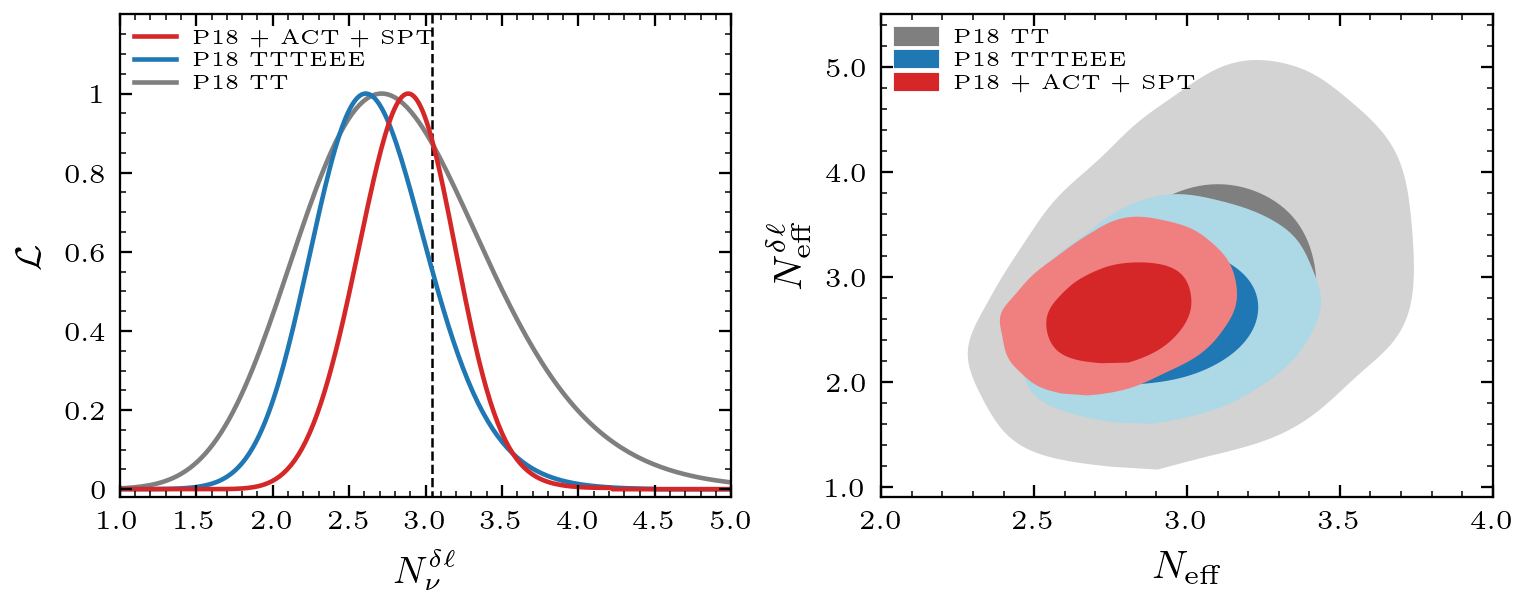

In [4]:
#############################################
############       FIGURE 3      ############
#############################################

"""

Spectrum Based Template Analysis  for P18TT, P18TTTEEEE and P18TTTEEE + ACT + SPT:

1) 2D contours of N^{\delta\ell}_{eff} vs N_{eff} (keeping YHe fixed)

2) 1D distributions of N^{\delta\ell}_\nu (keeping YHe fixed as well as N_{eff}=N^{SM}_\nu=3.044)

"""

fig1=plt.figure(figsize=(6.5,2.3),dpi=300)
gs1 = GridSpec(22,22,figure=fig1)
ax1 = fig1.add_subplot(gs1[1:-1,1:10])
ax2 = fig1.add_subplot(gs1[1:-1,12:-1])

ax2.fill(P18TT_ndell_nur_2d_Ndell_Nur_CLs[1][:,0],P18TT_ndell_nur_2d_Ndell_Nur_CLs[1][:,1],color=c_P18TT_ndX_nur[1],alpha=1)
ax2.fill(P18TT_ndell_nur_2d_Ndell_Nur_CLs[0][:,0],P18TT_ndell_nur_2d_Ndell_Nur_CLs[0][:,1],color=c_P18TT_ndX_nur[0],alpha=1,label=r'P18 TT')
ax2.fill(P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[1][:,0],P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur[1],alpha=1)
ax2.fill(P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[0][:,0],P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur[0],alpha=1,label=r'P18 TTTEEE')
ax2.fill(P18_ACT_spt3g_ndell_nur_2d_Ndell_Nur_CLs[1][:,0],P18_ACT_spt3g_ndell_nur_2d_Ndell_Nur_CLs[1][:,1],color=c_P18_ACT_SPT_ndX_nur[1],alpha=1)
ax2.fill(P18_ACT_spt3g_ndell_nur_2d_Ndell_Nur_CLs[0][:,0],P18_ACT_spt3g_ndell_nur_2d_Ndell_Nur_CLs[0][:,1],color=c_P18_ACT_SPT_ndX_nur[0],alpha=1,label=r'P18 + ACT + SPT')


ax1.plot(np.ones(7)*3.044,np.arange(7)-1,color='k',linewidth=.6,ls='dashed',zorder=0.8)


ax1.plot(np.concatenate((np.zeros(1),P18_ACT_spt3g_ndell_1d_Ndell_PD[0],np.ones(1)*6)),np.concatenate((np.zeros(1),P18_ACT_spt3g_ndell_1d_Ndell_PD[1],np.zeros(1))),color=c_P18_ACT_SPT_ndX_nur[0],linewidth=1.1,zorder=2,label=r"P18 + ACT + SPT")
ax1.plot(np.concatenate((np.zeros(1),P18TTTEEE_ndell_1d_Ndell_PD[0],np.ones(1)*6)),np.concatenate((np.zeros(1), P18TTTEEE_ndell_1d_Ndell_PD[1],np.zeros(1))),color=c_P18TTTEEE_ndX_nur[0],linewidth=1.1,zorder=1.5,label=r"P18 TTTEEE")
ax1.plot(P18TT_ndell_1d_Ndell_PD[0],P18TT_ndell_1d_Ndell_PD[1],color=c_P18TT_ndX_nur[0],linewidth=1.1,zorder=1,label=r"P18 TT")
ax1.set_xlabel(r"$N^{\delta\ell}_{\nu}$",fontdict={'fontsize':9,'family':'serif'})
ax1.set_ylabel(r"$\mathcal{L}$",fontdict={'fontsize':9,'family':'serif'})

ax1.tick_params(axis='both', which='major', labelsize=6.5)
ax1.tick_params(axis='both', which='minor', labelsize=6.5)
ax1.set_xlim(1,5)
ax1.set_ylim(-0.02,1.2)
ax1.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
ax1.legend(prop={'family':'serif','size':5.0},loc='upper left')

ax2.set_xlabel(r"$N_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax2.set_ylabel(r"$N^{\delta\ell}_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})

ax2.tick_params(axis='both', which='major', labelsize=6.5)
ax2.tick_params(axis='both', which='minor', labelsize=6.5)

ax2.set_xlim(2,4)
ax2.set_ylim(.9,5.5)
ax2.set_xticks([2,2.5,3,3.5,4])
ax2.set_yticks([1,2,3,4,5])
ax2.set_yticklabels([1.0,2.0,3.0,4.0,5.0])
ax2.legend(prop={'family':'serif','size':5.0},loc='upper left')
plt.savefig(main_plots_dir+"SBT_Ndell_Nur_CLs.pdf",bbox_inches='tight')
plt.savefig(main_plots_dir+"SBT_Ndell_Nur_Cls.png",bbox_inches='tight')
plt.show()


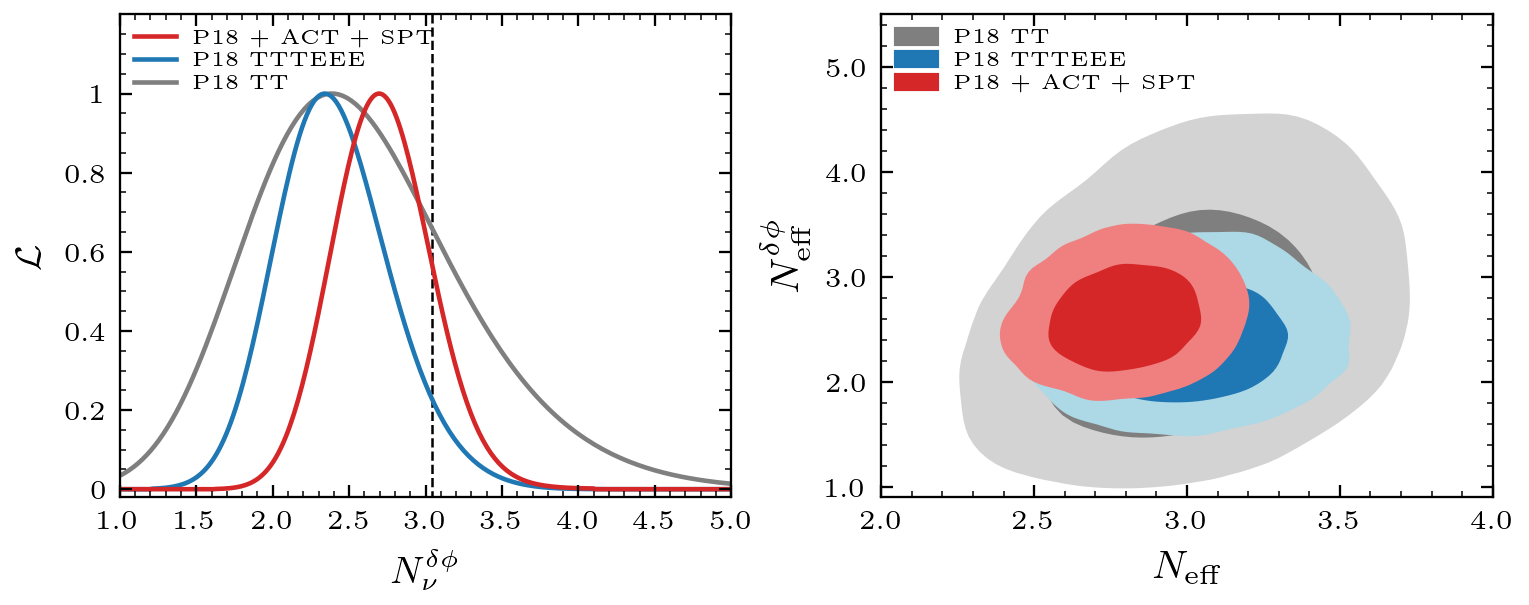

In [14]:
#############################################
############       FIGURE 6      ############
#############################################

"""

Perturbation Based Template Analysis for P18TT, P18TTTEEEE and P18TTTEEE + ACT + SPT:

1) 2D contours of N^{\delta\phi}_{eff} vs N_{eff} (keeping YHe fixed)

2) 1D distributions of N^{\delta\phi}_\nu (keeping YHe fixed as well as N_{eff}=N^{SM}_\nu=3.044)

"""

fig1=plt.figure(figsize=(6.5,2.3),dpi=300)
gs1 = GridSpec(22,22,figure=fig1)
ax1 = fig1.add_subplot(gs1[1:-1,1:10])
ax2 = fig1.add_subplot(gs1[1:-1,12:-1])

ax2.fill(P18TT_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,0],P18TT_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,1],color=c_P18TT_ndX_nur[1],alpha=1)
ax2.fill(P18TT_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,0],P18TT_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,1],color=c_P18TT_ndX_nur[0],alpha=1,label=r'P18 TT')
ax2.fill(P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,0],P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur[1],alpha=1)
ax2.fill(P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,0],P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur[0],alpha=1,label=r'P18 TTTEEE')
ax2.fill(P18_ACT_spt3g_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,0],P18_ACT_spt3g_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,1],color=c_P18_ACT_SPT_ndX_nur[1],alpha=1)
ax2.fill(P18_ACT_spt3g_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,0],P18_ACT_spt3g_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,1],color=c_P18_ACT_SPT_ndX_nur[0],alpha=1,label=r'P18 + ACT + SPT')


ax1.plot(np.ones(7)*3.044,np.arange(7)-1,color='k',linewidth=.6,ls='dashed',zorder=0.8)


ax1.plot(np.concatenate((np.zeros(1),P18_ACT_spt3g_ndphi_1d_Ndphi_PD[0],np.ones(1)*6)),np.concatenate((np.zeros(1),P18_ACT_spt3g_ndphi_1d_Ndphi_PD[1],np.zeros(1))),color=c_P18_ACT_SPT_ndX_nur[0],linewidth=1.1,zorder=2,label=r"P18 + ACT + SPT")
ax1.plot(np.concatenate((np.zeros(1),P18TTTEEE_ndphi_1d_Ndphi_PD[0],np.ones(1)*6)),np.concatenate((np.zeros(1), P18TTTEEE_ndphi_1d_Ndphi_PD[1],np.zeros(1))),color=c_P18TTTEEE_ndX_nur[0],linewidth=1.1,zorder=1.5,label=r"P18 TTTEEE")
ax1.plot(P18TT_ndphi_1d_Ndphi_PD[0],P18TT_ndphi_1d_Ndphi_PD[1],color=c_P18TT_ndX_nur[0],linewidth=1.1,zorder=1,label=r"P18 TT")
ax1.set_xlabel(r"$N^{\delta\phi}_{\nu}$",fontdict={'fontsize':9,'family':'serif'})
ax1.set_ylabel(r"$\mathcal{L}$",fontdict={'fontsize':9,'family':'serif'})

ax1.tick_params(axis='both', which='major', labelsize=6.5)
ax1.tick_params(axis='both', which='minor', labelsize=6.5)
ax1.set_xlim(1,5)
ax1.set_ylim(-0.02,1.2)
ax1.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5,5])
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
ax1.legend(prop={'family':'serif','size':5.0},loc='upper left')

ax2.set_xlabel(r"$N_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax2.set_ylabel(r"$N^{\delta\phi}_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})

ax2.tick_params(axis='both', which='major', labelsize=6.5)
ax2.tick_params(axis='both', which='minor', labelsize=6.5)

ax2.set_xlim(2,4)
ax2.set_ylim(.9,5.5)
ax2.set_xticks([2,2.5,3,3.5,4])
ax2.set_yticks([1,2,3,4,5])
ax2.set_yticklabels([1.0,2.0,3.0,4.0,5.0])
ax2.legend(prop={'family':'serif','size':5.0},loc='upper left')
plt.savefig(main_plots_dir+"PBT_Ndphi_Nur_CLs.pdf",bbox_inches='tight')
plt.savefig(main_plots_dir+"PBT_Ndphi_Nur_Cls.png",bbox_inches='tight')
plt.show()

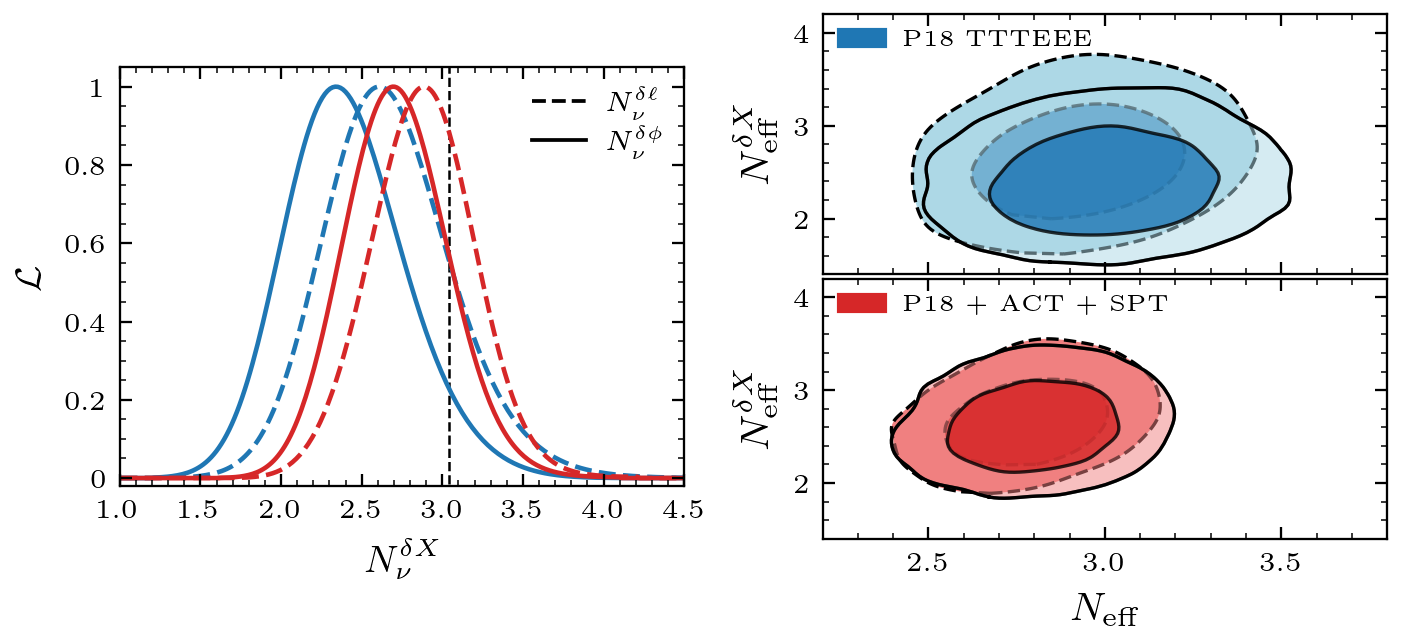

In [4]:
#############################################
############       FIGURE 8      ############
#############################################

"""

Comparison between Perturbation Based Template vs Spectrum Based Template Analysis for P18TTTEEEE and P18TTTEEE + ACT + SPT

1) 2D contours of N^{\delta\phi}_{eff} vs N_{eff} (keeping YHe fixed)

2) 1D distributions of N^{\delta\phi}_\nu (keeping YHe fixed as well as N_{eff}=N^{SM}_\nu=3.044)

"""

fig1=plt.figure(figsize=(6,2.5),dpi=300)
gs1 = GridSpec(22,22,figure=fig1)
ax1 = fig1.add_subplot(gs1[3:-3,1:10])
ax21 = fig1.add_subplot(gs1[1:11,12:-1])
ax22 = fig1.add_subplot(gs1[11:21,12:-1])

ax21.fill(np.NaN,np.NaN,color=c_P18TTTEEE_ndX_nur[0],alpha=1,label=r'P18 TTTEEE')
ax22.fill(np.NaN,np.NaN,color=c_P18_ACT_SPT_ndX_nur[0],alpha=1,label=r'P18 + ACT + SPT')

ax21.fill(P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[1][:,0],P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur[1],alpha=1,edgecolor='k',ls='dashed',lw=0.8)
ax21.fill(P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[0][:,0],P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur[0],alpha=0.8,edgecolor='k',ls='dashed',lw=0.8)

ax21.fill(P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,0],P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur[1],alpha=.5,edgecolor='k',ls='solid',lw=0.8)
ax21.fill(P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,0],P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur[0],alpha=.8,edgecolor='k',ls='solid',lw=0.8)
ax21.plot(P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,0],P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,1],alpha=1,c='k',ls='solid',lw=0.8)



ax22.fill(P18_ACT_spt3g_ndell_nur_2d_Ndell_Nur_CLs[1][:,0],P18_ACT_spt3g_ndell_nur_2d_Ndell_Nur_CLs[1][:,1],color=c_P18_ACT_SPT_ndX_nur[1],alpha=1,edgecolor='k',ls='dashed',lw=0.8)
ax22.fill(P18_ACT_spt3g_ndell_nur_2d_Ndell_Nur_CLs[0][:,0],P18_ACT_spt3g_ndell_nur_2d_Ndell_Nur_CLs[0][:,1],color=c_P18_ACT_SPT_ndX_nur[0],alpha=.8,edgecolor='k',ls='dashed',lw=0.8)

ax22.fill(P18_ACT_spt3g_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,0],P18_ACT_spt3g_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,1],color=c_P18_ACT_SPT_ndX_nur[1],alpha=.5,edgecolor='k',ls='solid',lw=0.8)
ax22.fill(P18_ACT_spt3g_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,0],P18_ACT_spt3g_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,1],color=c_P18_ACT_SPT_ndX_nur[0],alpha=.8,edgecolor='k',ls='solid',lw=0.8)
ax22.plot(P18_ACT_spt3g_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,0],P18_ACT_spt3g_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,1],color='k',alpha=1,ls='solid',lw=0.8)

ax1.plot(np.ones(7)*3.044,np.arange(7)-1,color='k',linewidth=.6,ls='dashed',zorder=0.8)


ax1.plot(np.concatenate((np.zeros(1),P18TTTEEE_ndphi_1d_Ndphi_PD[0],np.ones(1)*6)),np.concatenate((np.zeros(1), P18TTTEEE_ndphi_1d_Ndphi_PD[1],np.zeros(1))),color=c_P18TTTEEE_ndX_nur[0],linewidth=1.1,zorder=1.5)
ax1.plot(np.concatenate((np.zeros(1),P18TTTEEE_ndell_1d_Ndell_PD[0],np.ones(1)*6)),np.concatenate((np.zeros(1), P18TTTEEE_ndell_1d_Ndell_PD[1],np.zeros(1))),color=c_P18TTTEEE_ndX_nur[0],linewidth=1.1,zorder=1.5,ls='dashed')

ax1.plot(np.concatenate((np.zeros(1),P18_ACT_spt3g_ndphi_1d_Ndphi_PD[0],np.ones(1)*6)),np.concatenate((np.zeros(1), P18_ACT_spt3g_ndphi_1d_Ndphi_PD[1],np.zeros(1))),color=c_P18_ACT_SPT_ndX_nur[0],linewidth=1.1,zorder=1.5)
ax1.plot(np.concatenate((np.zeros(1),P18_ACT_spt3g_ndell_1d_Ndell_PD[0],np.ones(1)*6)),np.concatenate((np.zeros(1), P18_ACT_spt3g_ndell_1d_Ndell_PD[1],np.zeros(1))),color=c_P18_ACT_SPT_ndX_nur[0],linewidth=1.1,zorder=1.5,ls='dashed')


ax1.plot(np.NaN,np.NaN,c='k',ls='dashed',label=r'$N^{\delta \ell}_{\nu}$',lw=0.9)
ax1.plot(np.NaN,np.NaN,c='k',ls='solid',label=r'$N^{\delta \phi}_{\nu}$',lw=0.9)
ax1.set_xlabel(r"$N^{\delta X}_{\nu}$",fontdict={'fontsize':9,'family':'serif'})
ax1.set_ylabel(r"$\mathcal{L}$",fontdict={'fontsize':9,'family':'serif'})

ax1.tick_params(axis='both', which='major', labelsize=6.5)
ax1.tick_params(axis='both', which='minor', labelsize=6.5)
ax1.set_xlim(1,4.5)
ax1.set_ylim(-0.02,1.05)
ax1.set_xticks([1,1.5,2,2.5,3,3.5,4,4.5])
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1])
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1])
ax1.legend(prop={'family':'serif','size':6.5},loc='upper right')

ax22.set_xlabel(r"$N_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax22.set_ylabel(r"$N^{\delta X}_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})

ax21.tick_params(axis='both', which='major', labelsize=6.5)
ax21.tick_params(axis='both', which='minor', labelsize=6.5)
ax21.set_xlim(2.2,3.8)
ax21.set_ylim(1.4,4.2)
ax21.set_yticks([2,3,4])
ax21.set_xticks([2.5,3,3.5])
ax21.set_xticklabels([])
ax21.legend(prop={'family':'serif','size':5.5},loc='upper left')

ax21.set_ylabel(r"$N^{\delta X}_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax22.set_ylabel(r"$N^{\delta X}_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})

ax22.tick_params(axis='both', which='major', labelsize=6.5)
ax22.tick_params(axis='both', which='minor', labelsize=6.5)
ax22.set_xlim(2.2,3.8)
ax22.set_ylim(1.4,4.2)
ax22.set_yticks([2,3,4])
ax22.set_xticks([2.5,3,3.5])
ax22.legend(prop={'family':'serif','size':5.5},loc='upper left')
plt.savefig(main_plots_dir+"SBT_vs_PBT_NdX_Nur_CLs.pdf",bbox_inches='tight')
plt.savefig(main_plots_dir+"SBT_vs_PBT_NdX_Nur_Cls.png",bbox_inches='tight')
plt.show()

## 2. Figures of MCMC analysis with varying $Y_{\rm{He}}$ 

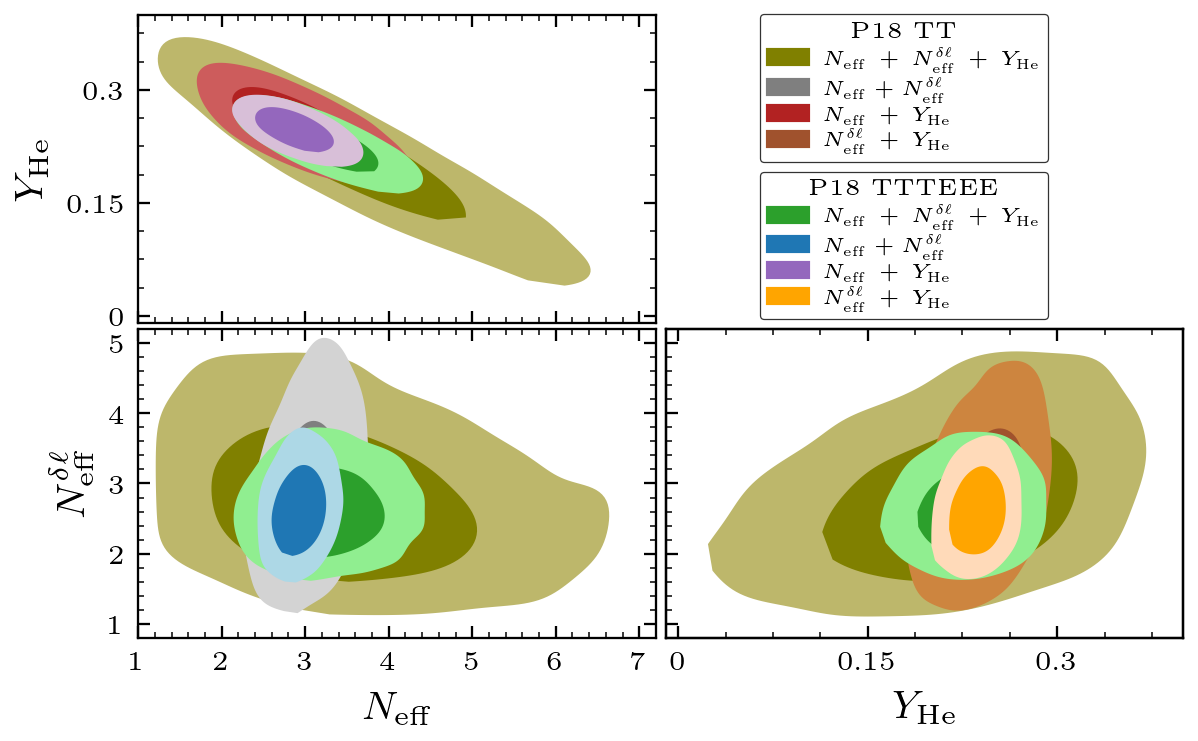

In [67]:
#############################################
############       FIGURE 5      ############
#############################################

"""

Spectrum Based Template Analysis  for P18TT and P18TTTEEEE:

2D contours of:
    1) N^{\delta\ell}_{eff} vs N_{eff} (for fixed and varying YHe)
    2) N^{\delta\ell}_{eff} vs YH_e (for fixed and varying N_{eff})
    3) N_{eff} vs YH_e (for fixed and varying N^{\delta\ell}_{eff})

"""


fig1=plt.figure(figsize=(5,3),dpi=300)
gs1 = GridSpec(20,20,figure=fig1)
ax1 = fig1.add_subplot(gs1[1:10,1:10])
ax2 = fig1.add_subplot(gs1[10:19,1:10])
ax3 = fig1.add_subplot(gs1[10:19,10:19])

ax3.set_xlabel(r"$Y_{\rm{He}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax1.set_ylabel(r"$Y_{\rm{He}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax2.set_ylabel(r"$N^{\delta\ell}_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax2.set_xlabel(r"$N_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})



ax1.fill(P18TT_ndell_nur_yhe_2d_Nur_YHe_CLs[1][:,0],P18TT_ndell_nur_yhe_2d_Nur_YHe_CLs[1][:,1],color=c_P18TT_ndX_nur_yhe[1],alpha=1)
ax1.fill(P18TT_ndell_nur_yhe_2d_Nur_YHe_CLs[0][:,0],P18TT_ndell_nur_yhe_2d_Nur_YHe_CLs[0][:,1],color=c_P18TT_ndX_nur_yhe[0],alpha=1)
ax1.fill(P18TT_nur_yhe_2d_Nur_YHe_CLs[1][:,0],P18TT_nur_yhe_2d_Nur_YHe_CLs[1][:,1],color=c_P18TT_nur_yhe[1],alpha=1)
ax1.fill(P18TT_nur_yhe_2d_Nur_YHe_CLs[0][:,0],P18TT_nur_yhe_2d_Nur_YHe_CLs[0][:,1],color=c_P18TT_nur_yhe[0],alpha=1)
ax1.fill(P18TTTEEE_ndell_nur_yhe_2d_Nur_YHe_CLs[1][:,0],P18TTTEEE_ndell_nur_yhe_2d_Nur_YHe_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur_yhe[1],alpha=1)
ax1.fill(P18TTTEEE_ndell_nur_yhe_2d_Nur_YHe_CLs[0][:,0],P18TTTEEE_ndell_nur_yhe_2d_Nur_YHe_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur_yhe[0],alpha=1)
ax1.fill(P18TTTEEE_nur_yhe_2d_Nur_YHe_CLs[1][:,0],P18TTTEEE_nur_yhe_2d_Nur_YHe_CLs[1][:,1],color=c_P18TTTEEE_nur_yhe[1],alpha=1)
ax1.fill(P18TTTEEE_nur_yhe_2d_Nur_YHe_CLs[0][:,0],P18TTTEEE_nur_yhe_2d_Nur_YHe_CLs[0][:,1],color=c_P18TTTEEE_nur_yhe[0],alpha=1)

ax2.fill(P18TT_ndell_nur_yhe_2d_Ndell_Nur_CLs[1][:,0],P18TT_ndell_nur_yhe_2d_Ndell_Nur_CLs[1][:,1],color=c_P18TT_ndX_nur_yhe[1],alpha=1)
ax2.fill(P18TT_ndell_nur_yhe_2d_Ndell_Nur_CLs[0][:,0],P18TT_ndell_nur_yhe_2d_Ndell_Nur_CLs[0][:,1],color=c_P18TT_ndX_nur_yhe[0],alpha=1)
ax2.fill(P18TT_ndell_nur_2d_Ndell_Nur_CLs[1][:,0],P18TT_ndell_nur_2d_Ndell_Nur_CLs[1][:,1],color=c_P18TT_ndX_nur[1],alpha=1)
ax2.fill(P18TT_ndell_nur_2d_Ndell_Nur_CLs[0][:,0],P18TT_ndell_nur_2d_Ndell_Nur_CLs[0][:,1],color=c_P18TT_ndX_nur[0],alpha=1)
ax2.fill(P18TTTEEE_ndell_nur_yhe_2d_Ndell_Nur_CLs[1][:,0],P18TTTEEE_ndell_nur_yhe_2d_Ndell_Nur_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur_yhe[1],alpha=1)
ax2.fill(P18TTTEEE_ndell_nur_yhe_2d_Ndell_Nur_CLs[0][:,0],P18TTTEEE_ndell_nur_yhe_2d_Ndell_Nur_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur_yhe[0],alpha=1)
ax2.fill(P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[1][:,0],P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur[1],alpha=1)
ax2.fill(P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[0][:,0],P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur[0],alpha=1)

ax3.fill(P18TT_ndell_nur_yhe_2d_Ndell_YHe_CLs[1][:,1],P18TT_ndell_nur_yhe_2d_Ndell_YHe_CLs[1][:,0],color=c_P18TT_ndX_nur_yhe[1],alpha=1)
ax3.fill(P18TT_ndell_nur_yhe_2d_Ndell_YHe_CLs[0][:,1],P18TT_ndell_nur_yhe_2d_Ndell_YHe_CLs[0][:,0],color=c_P18TT_ndX_nur_yhe[0],alpha=1)
ax3.fill(P18TT_ndell_yhe_2d_Ndell_YHe_CLs[1][:,1],P18TT_ndell_yhe_2d_Ndell_YHe_CLs[1][:,0],color=c_P18TT_ndX_yhe[1],alpha=1)
ax3.fill(P18TT_ndell_yhe_2d_Ndell_YHe_CLs[0][:,1],P18TT_ndell_yhe_2d_Ndell_YHe_CLs[0][:,0],color=c_P18TT_ndX_yhe[0],alpha=1)
ax3.fill(P18TTTEEE_ndell_nur_yhe_2d_Ndell_YHe_CLs[1][:,1],P18TTTEEE_ndell_nur_yhe_2d_Ndell_YHe_CLs[1][:,0],color=c_P18TTTEEE_ndX_nur_yhe[1],alpha=1)
ax3.fill(P18TTTEEE_ndell_nur_yhe_2d_Ndell_YHe_CLs[0][:,1],P18TTTEEE_ndell_nur_yhe_2d_Ndell_YHe_CLs[0][:,0],color=c_P18TTTEEE_ndX_nur_yhe[0],alpha=1)
ax3.fill(P18TTTEEE_ndell_yhe_2d_Ndell_YHe_CLs[1][:,1],P18TTTEEE_ndell_yhe_2d_Ndell_YHe_CLs[1][:,0],color=c_P18TTTEEE_ndX_yhe[1],alpha=1)
ax3.fill(P18TTTEEE_ndell_yhe_2d_Ndell_YHe_CLs[0][:,1],P18TTTEEE_ndell_yhe_2d_Ndell_YHe_CLs[0][:,0],color=c_P18TTTEEE_ndX_yhe[0],alpha=1)

#####################################
### Create Legend on fourth Axis: ###
#####################################

# Labels for the legend
labels_P18 = [r'$N_{\rm{eff}}\,+\,N^{\delta\ell}_{\rm{eff}}\,+\,Y_{\rm{He}}$', r'$N_{\rm{eff}}+N^{\delta\ell}_{\rm{eff}}$', r'$N_{\rm{eff}}\,+\,Y_{\rm{He}}$', r'$N^{\delta\ell}_{\rm{eff}}\,+\,Y_{\rm{He}}$']

color_labels_P18TT = [c_P18TT_ndX_nur_yhe[0],c_P18TT_ndX_nur[0],c_P18TT_nur_yhe[0],c_P18TT_ndX_yhe[0]]
color_labels_P18TTTEEE = [c_P18TTTEEE_ndX_nur_yhe[0],c_P18TTTEEE_ndX_nur[0],c_P18TTTEEE_nur_yhe[0],c_P18TTTEEE_ndX_yhe[0]]

ax3twin = ax3.twinx()
ax3twin.get_yaxis().set_visible(False)
ax3twin.set_xticks([])
ax3twin.set_yticks([])
# Add fake plots to create the legend entries
for i in range(len(labels_P18TT)):
    ax3.fill(np.NaN, np.NaN,label=labels_P18[i], color=color_labels_P18TT[i])
for i in range(len(labels_P18TTTEEE)):
    ax3twin.fill(np.NaN, np.NaN, label=labels_P18[i], color=color_labels_P18TTTEEE[i])

# Create custom legends
handles_ax3, labels_ax3= ax3.get_legend_handles_labels()
handles_ax3twin, labels_ax3twin= ax3twin.get_legend_handles_labels()



# Create the combined legend
legend_ax3= ax3.legend(handles_ax3, labels_ax3, prop={'family':'serif','size':4.8},loc='upper right',bbox_to_anchor=(.75, 2.04),
    title='P18 TT',title_fontsize=5.5,
    frameon=True,          # Display the legend frame
    framealpha=0.8,        # Transparency (0.0 to 1.0)
    facecolor='white', # Background color
    edgecolor='k'      # Border color
    )
legend_ax3.get_frame().set_linewidth(.3)
legend_ax3twin= ax3twin.legend(handles_ax3twin, labels_ax3twin, prop={'family':'serif','size':4.8},loc='upper right',bbox_to_anchor=(.75, 1.53),
    title='P18 TTTEEE',title_fontsize=5.5,
    frameon=True,          # Display the legend frame
    framealpha=0.8,        # Transparency (0.0 to 1.0)
    facecolor='white', # Background color
    edgecolor='k'      # Border color
    )
legend_ax3twin.get_frame().set_linewidth(.3)

ax2.set_ylim(0.8,5.2)
ax3.set_ylim(.8,5.2)
ax2.set_xlim(1,7.2)
ax3.set_xlim(-0.01,0.4)
ax1.set_ylim(-0.01,0.4)
ax1.set_xlim(1,7.2)

ax1.tick_params(axis='both', which='major', labelsize=6.5)
ax1.tick_params(axis='both', which='minor', labelsize=6.5)
ax2.tick_params(axis='both', which='major', labelsize=6.5)
ax2.tick_params(axis='both', which='minor', labelsize=6.5)
ax3.tick_params(axis='both', which='major', labelsize=6.5)
ax3.tick_params(axis='both', which='minor', labelsize=6.5)

ax1.set_yticks([0,0.15,0.3])
ax1.set_yticklabels([0,0.15,0.3])
ax1.set_xticks([1,2,3,4,5,6,7])
ax1.set_xticklabels([])
ax2.set_xticks([1,2,3,4,5,6,7])
ax2.set_yticks([1,2,3,4,5])
ax2.set_yticklabels([1,2,3,4,5])
ax3.set_yticks([1,2,3,4,5])
ax3.set_yticklabels([])
ax3.set_xticks([0,0.15,0.3])
ax3.set_xticklabels([0,0.15,0.3])

plt.savefig(main_plots_dir+'Planck_Ndell_Nur_YHe_CLs_sbt.png',bbox_inches='tight')
plt.savefig(main_plots_dir+'Planck_Ndell_Nur_YHe_CLs_sbt.pdf',bbox_inches='tight')
plt.show()
plt.close()

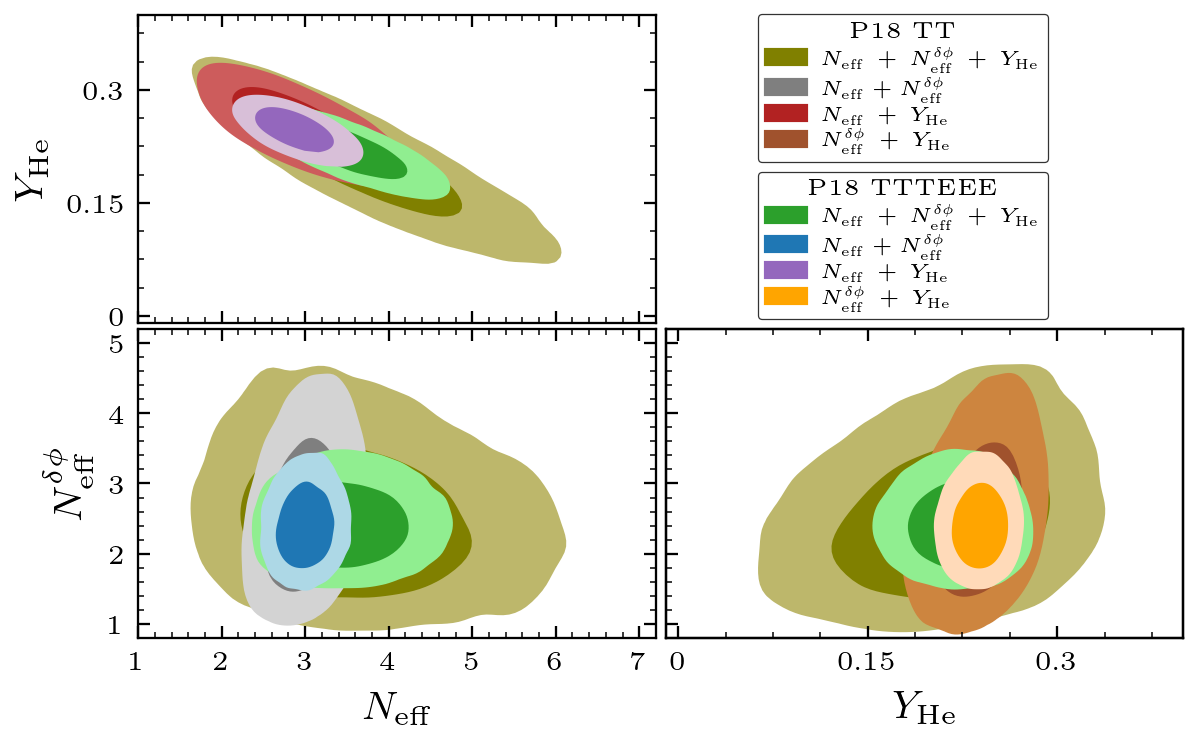

In [68]:
#############################################
############       FIGURE 7      ############
#############################################

"""

Perturbation Based Template Analysis  for P18TT and P18TTTEEEE:

2D contours of:
    1) N^{\delta\phi}_{eff} vs N_{eff} (for fixed and varying YHe)
    2) N^{\delta\phi}_{eff} vs YH_e (for fixed and varying N_{eff})
    3) N_{eff} vs YH_e (for fixed and varying N^{\delta\phi}_{eff})

"""


fig1=plt.figure(figsize=(5,3),dpi=300)
gs1 = GridSpec(20,20,figure=fig1)
ax1 = fig1.add_subplot(gs1[1:10,1:10])
ax2 = fig1.add_subplot(gs1[10:19,1:10])
ax3 = fig1.add_subplot(gs1[10:19,10:19])

ax3.set_xlabel(r"$Y_{\rm{He}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax1.set_ylabel(r"$Y_{\rm{He}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax2.set_ylabel(r"$N^{\delta\phi}_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax2.set_xlabel(r"$N_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})



ax1.fill(P18TT_ndphi_nur_yhe_2d_Nur_YHe_CLs[1][:,0],P18TT_ndphi_nur_yhe_2d_Nur_YHe_CLs[1][:,1],color=c_P18TT_ndX_nur_yhe[1],alpha=1)
ax1.fill(P18TT_ndphi_nur_yhe_2d_Nur_YHe_CLs[0][:,0],P18TT_ndphi_nur_yhe_2d_Nur_YHe_CLs[0][:,1],color=c_P18TT_ndX_nur_yhe[0],alpha=1)
ax1.fill(P18TT_nur_yhe_2d_Nur_YHe_CLs[1][:,0],P18TT_nur_yhe_2d_Nur_YHe_CLs[1][:,1],color=c_P18TT_nur_yhe[1],alpha=1)
ax1.fill(P18TT_nur_yhe_2d_Nur_YHe_CLs[0][:,0],P18TT_nur_yhe_2d_Nur_YHe_CLs[0][:,1],color=c_P18TT_nur_yhe[0],alpha=1)
ax1.fill(P18TTTEEE_ndphi_nur_yhe_2d_Nur_YHe_CLs[1][:,0],P18TTTEEE_ndphi_nur_yhe_2d_Nur_YHe_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur_yhe[1],alpha=1)
ax1.fill(P18TTTEEE_ndphi_nur_yhe_2d_Nur_YHe_CLs[0][:,0],P18TTTEEE_ndphi_nur_yhe_2d_Nur_YHe_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur_yhe[0],alpha=1)
ax1.fill(P18TTTEEE_nur_yhe_2d_Nur_YHe_CLs[1][:,0],P18TTTEEE_nur_yhe_2d_Nur_YHe_CLs[1][:,1],color=c_P18TTTEEE_nur_yhe[1],alpha=1)
ax1.fill(P18TTTEEE_nur_yhe_2d_Nur_YHe_CLs[0][:,0],P18TTTEEE_nur_yhe_2d_Nur_YHe_CLs[0][:,1],color=c_P18TTTEEE_nur_yhe[0],alpha=1)

ax2.fill(P18TT_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[1][:,0],P18TT_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[1][:,1],color=c_P18TT_ndX_nur_yhe[1],alpha=1)
ax2.fill(P18TT_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[0][:,0],P18TT_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[0][:,1],color=c_P18TT_ndX_nur_yhe[0],alpha=1)
ax2.fill(P18TT_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,0],P18TT_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,1],color=c_P18TT_ndX_nur[1],alpha=1)
ax2.fill(P18TT_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,0],P18TT_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,1],color=c_P18TT_ndX_nur[0],alpha=1)
ax2.fill(P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[1][:,0],P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur_yhe[1],alpha=1)
ax2.fill(P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[0][:,0],P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur_yhe[0],alpha=1)
ax2.fill(P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,0],P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur[1],alpha=1)
ax2.fill(P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,0],P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur[0],alpha=1)

ax3.fill(P18TT_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[1][:,1],P18TT_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[1][:,0],color=c_P18TT_ndX_nur_yhe[1],alpha=1)
ax3.fill(P18TT_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[0][:,1],P18TT_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[0][:,0],color=c_P18TT_ndX_nur_yhe[0],alpha=1)
ax3.fill(P18TT_ndphi_yhe_2d_Ndphi_YHe_CLs[1][:,1],P18TT_ndphi_yhe_2d_Ndphi_YHe_CLs[1][:,0],color=c_P18TT_ndX_yhe[1],alpha=1)
ax3.fill(P18TT_ndphi_yhe_2d_Ndphi_YHe_CLs[0][:,1],P18TT_ndphi_yhe_2d_Ndphi_YHe_CLs[0][:,0],color=c_P18TT_ndX_yhe[0],alpha=1)
ax3.fill(P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[1][:,1],P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[1][:,0],color=c_P18TTTEEE_ndX_nur_yhe[1],alpha=1)
ax3.fill(P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[0][:,1],P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[0][:,0],color=c_P18TTTEEE_ndX_nur_yhe[0],alpha=1)
ax3.fill(P18TTTEEE_ndphi_yhe_2d_Ndphi_YHe_CLs[1][:,1],P18TTTEEE_ndphi_yhe_2d_Ndphi_YHe_CLs[1][:,0],color=c_P18TTTEEE_ndX_yhe[1],alpha=1)
ax3.fill(P18TTTEEE_ndphi_yhe_2d_Ndphi_YHe_CLs[0][:,1],P18TTTEEE_ndphi_yhe_2d_Ndphi_YHe_CLs[0][:,0],color=c_P18TTTEEE_ndX_yhe[0],alpha=1)

#####################################
### Create Legend on fourth Axis: ###
#####################################

# Labels for the legend
labels_P18 = [r'$N_{\rm{eff}}\,+\,N^{\delta\phi}_{\rm{eff}}\,+\,Y_{\rm{He}}$', r'$N_{\rm{eff}}+N^{\delta\phi}_{\rm{eff}}$', r'$N_{\rm{eff}}\,+\,Y_{\rm{He}}$', r'$N^{\delta\phi}_{\rm{eff}}\,+\,Y_{\rm{He}}$']

color_labels_P18TT = [c_P18TT_ndX_nur_yhe[0],c_P18TT_ndX_nur[0],c_P18TT_nur_yhe[0],c_P18TT_ndX_yhe[0]]
color_labels_P18TTTEEE = [c_P18TTTEEE_ndX_nur_yhe[0],c_P18TTTEEE_ndX_nur[0],c_P18TTTEEE_nur_yhe[0],c_P18TTTEEE_ndX_yhe[0]]

ax3twin = ax3.twinx()
ax3twin.get_yaxis().set_visible(False)
ax3twin.set_xticks([])
ax3twin.set_yticks([])
# Add fake plots to create the legend entries
for i in range(len(labels_P18TT)):
    ax3.fill(np.NaN, np.NaN,label=labels_P18[i], color=color_labels_P18TT[i])
for i in range(len(labels_P18TTTEEE)):
    ax3twin.fill(np.NaN, np.NaN, label=labels_P18[i], color=color_labels_P18TTTEEE[i])

# Create custom legends
handles_ax3, labels_ax3= ax3.get_legend_handles_labels()
handles_ax3twin, labels_ax3twin= ax3twin.get_legend_handles_labels()



# Create the combined legend
legend_ax3= ax3.legend(handles_ax3, labels_ax3, prop={'family':'serif','size':4.8},loc='upper right',bbox_to_anchor=(.75, 2.04),
    title='P18 TT',title_fontsize=5.5,
    frameon=True,          # Display the legend frame
    framealpha=0.8,        # Transparency (0.0 to 1.0)
    facecolor='white', # Background color
    edgecolor='k'      # Border color
    )
legend_ax3.get_frame().set_linewidth(.3)
legend_ax3twin= ax3twin.legend(handles_ax3twin, labels_ax3twin, prop={'family':'serif','size':4.8},loc='upper right',bbox_to_anchor=(.75, 1.53),
    title='P18 TTTEEE',title_fontsize=5.5,
    frameon=True,          # Display the legend frame
    framealpha=0.8,        # Transparency (0.0 to 1.0)
    facecolor='white', # Background color
    edgecolor='k'      # Border color
    )
legend_ax3twin.get_frame().set_linewidth(.3)

ax2.set_ylim(0.8,5.2)
ax3.set_ylim(.8,5.2)
ax2.set_xlim(1,7.2)
ax3.set_xlim(-0.01,0.4)
ax1.set_ylim(-0.01,0.4)
ax1.set_xlim(1,7.2)

ax1.tick_params(axis='both', which='major', labelsize=6.5)
ax1.tick_params(axis='both', which='minor', labelsize=6.5)
ax2.tick_params(axis='both', which='major', labelsize=6.5)
ax2.tick_params(axis='both', which='minor', labelsize=6.5)
ax3.tick_params(axis='both', which='major', labelsize=6.5)
ax3.tick_params(axis='both', which='minor', labelsize=6.5)

ax1.set_yticks([0,0.15,0.3])
ax1.set_yticklabels([0,0.15,0.3])
ax1.set_xticks([1,2,3,4,5,6,7])
ax1.set_xticklabels([])
ax2.set_xticks([1,2,3,4,5,6,7])
ax2.set_yticks([1,2,3,4,5])
ax2.set_yticklabels([1,2,3,4,5])
ax3.set_yticks([1,2,3,4,5])
ax3.set_yticklabels([])
ax3.set_xticks([0,0.15,0.3])
ax3.set_xticklabels([0,0.15,0.3])

plt.savefig(main_plots_dir+'Planck_Ndphi_Nur_YHe_CLs_pbt.png',bbox_inches='tight')
plt.savefig(main_plots_dir+'Planck_Ndphi_Nur_YHe_CLs_pbt.pdf',bbox_inches='tight')
plt.show()
plt.close()

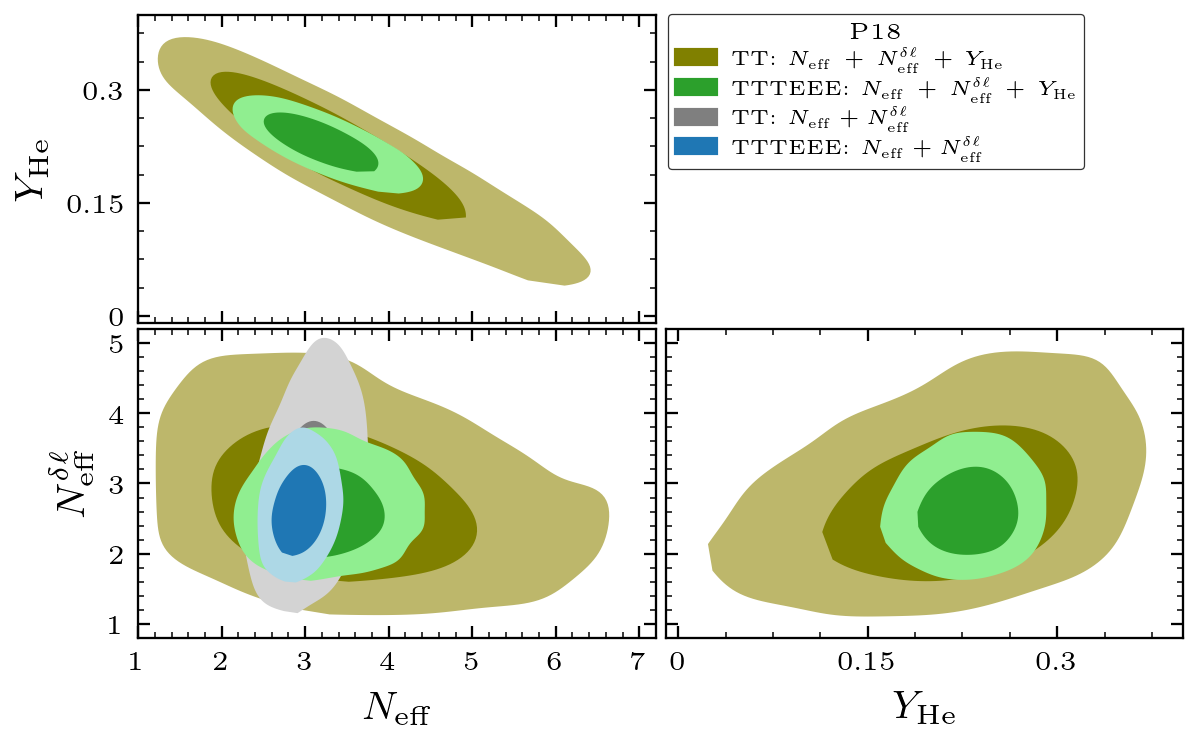

In [75]:
################################################
############       FIGURE 5 v2      ############
################################################

"""

Spectrum Based Template Analysis  for P18TT and P18TTTEEEE:

2D contours of:
    1) N^{\delta\ell}_{eff} vs N_{eff} (for fixed and varying YHe)
    2) N^{\delta\ell}_{eff} vs YH_e (only varying N_{eff})
    3) N_{eff} vs YH_e (only varying N^{\delta\ell}_{eff})

"""


fig1=plt.figure(figsize=(5,3),dpi=300)
gs1 = GridSpec(20,20,figure=fig1)
ax1 = fig1.add_subplot(gs1[1:10,1:10])
ax2 = fig1.add_subplot(gs1[10:19,1:10])
ax3 = fig1.add_subplot(gs1[10:19,10:19])

ax3.set_xlabel(r"$Y_{\rm{He}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax1.set_ylabel(r"$Y_{\rm{He}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax2.set_ylabel(r"$N^{\delta\ell}_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax2.set_xlabel(r"$N_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})



ax1.fill(P18TT_ndell_nur_yhe_2d_Nur_YHe_CLs[1][:,0],P18TT_ndell_nur_yhe_2d_Nur_YHe_CLs[1][:,1],color=c_P18TT_ndX_nur_yhe[1],alpha=1)
ax1.fill(P18TT_ndell_nur_yhe_2d_Nur_YHe_CLs[0][:,0],P18TT_ndell_nur_yhe_2d_Nur_YHe_CLs[0][:,1],color=c_P18TT_ndX_nur_yhe[0],alpha=1)
ax1.fill(P18TTTEEE_ndell_nur_yhe_2d_Nur_YHe_CLs[1][:,0],P18TTTEEE_ndell_nur_yhe_2d_Nur_YHe_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur_yhe[1],alpha=1)
ax1.fill(P18TTTEEE_ndell_nur_yhe_2d_Nur_YHe_CLs[0][:,0],P18TTTEEE_ndell_nur_yhe_2d_Nur_YHe_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur_yhe[0],alpha=1)

ax2.fill(P18TT_ndell_nur_yhe_2d_Ndell_Nur_CLs[1][:,0],P18TT_ndell_nur_yhe_2d_Ndell_Nur_CLs[1][:,1],color=c_P18TT_ndX_nur_yhe[1],alpha=1)
ax2.fill(P18TT_ndell_nur_yhe_2d_Ndell_Nur_CLs[0][:,0],P18TT_ndell_nur_yhe_2d_Ndell_Nur_CLs[0][:,1],color=c_P18TT_ndX_nur_yhe[0],alpha=1)
ax2.fill(P18TT_ndell_nur_2d_Ndell_Nur_CLs[1][:,0],P18TT_ndell_nur_2d_Ndell_Nur_CLs[1][:,1],color=c_P18TT_ndX_nur[1],alpha=1)
ax2.fill(P18TT_ndell_nur_2d_Ndell_Nur_CLs[0][:,0],P18TT_ndell_nur_2d_Ndell_Nur_CLs[0][:,1],color=c_P18TT_ndX_nur[0],alpha=1)
ax2.fill(P18TTTEEE_ndell_nur_yhe_2d_Ndell_Nur_CLs[1][:,0],P18TTTEEE_ndell_nur_yhe_2d_Ndell_Nur_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur_yhe[1],alpha=1)
ax2.fill(P18TTTEEE_ndell_nur_yhe_2d_Ndell_Nur_CLs[0][:,0],P18TTTEEE_ndell_nur_yhe_2d_Ndell_Nur_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur_yhe[0],alpha=1)
ax2.fill(P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[1][:,0],P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur[1],alpha=1)
ax2.fill(P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[0][:,0],P18TTTEEE_ndell_nur_2d_Ndell_Nur_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur[0],alpha=1)

ax3.fill(P18TT_ndell_nur_yhe_2d_Ndell_YHe_CLs[1][:,1],P18TT_ndell_nur_yhe_2d_Ndell_YHe_CLs[1][:,0],color=c_P18TT_ndX_nur_yhe[1],alpha=1)
ax3.fill(P18TT_ndell_nur_yhe_2d_Ndell_YHe_CLs[0][:,1],P18TT_ndell_nur_yhe_2d_Ndell_YHe_CLs[0][:,0],color=c_P18TT_ndX_nur_yhe[0],alpha=1)
ax3.fill(P18TTTEEE_ndell_nur_yhe_2d_Ndell_YHe_CLs[1][:,1],P18TTTEEE_ndell_nur_yhe_2d_Ndell_YHe_CLs[1][:,0],color=c_P18TTTEEE_ndX_nur_yhe[1],alpha=1)
ax3.fill(P18TTTEEE_ndell_nur_yhe_2d_Ndell_YHe_CLs[0][:,1],P18TTTEEE_ndell_nur_yhe_2d_Ndell_YHe_CLs[0][:,0],color=c_P18TTTEEE_ndX_nur_yhe[0],alpha=1)

#####################################
### Create Legend on fourth Axis: ###
#####################################

# Labels for the legend
labels_P18 = [r'TT: $N_{\rm{eff}}\,+\,N^{\delta\ell}_{\rm{eff}}\,+\,Y_{\rm{He}}$', r'TTTEEE: $N_{\rm{eff}}\,+\,N^{\delta\ell}_{\rm{eff}}\,+\,Y_{\rm{He}}$', r'TT: $N_{\rm{eff}}+N^{\delta\ell}_{\rm{eff}}$', r'TTTEEE: $N_{\rm{eff}}+N^{\delta\ell}_{\rm{eff}}$']

color_labels_P18 = [c_P18TT_ndX_nur_yhe[0], c_P18TTTEEE_ndX_nur_yhe[0], c_P18TT_ndX_nur[0],c_P18TTTEEE_ndX_nur[0]]

# Add fake plots to create the legend entries
for i in range(len(labels_P18)):
    ax3.fill(np.NaN, np.NaN,label=labels_P18[i], color=color_labels_P18[i])

# Create custom legends
handles_ax3, labels_ax3= ax3.get_legend_handles_labels()

# Create the combined legend
legend_ax3= ax3.legend(handles_ax3, labels_ax3, prop={'family':'serif','size':4.8},loc='upper right',bbox_to_anchor=(.82, 2.04),
    title='P18',title_fontsize=5.5,
    frameon=True,          # Display the legend frame
    framealpha=0.8,        # Transparency (0.0 to 1.0)
    facecolor='white', # Background color
    edgecolor='k'      # Border color
    )
legend_ax3.get_frame().set_linewidth(.3)


ax2.set_ylim(0.8,5.2)
ax3.set_ylim(.8,5.2)
ax2.set_xlim(1,7.2)
ax3.set_xlim(-0.01,0.4)
ax1.set_ylim(-0.01,0.4)
ax1.set_xlim(1,7.2)

ax1.tick_params(axis='both', which='major', labelsize=6.5)
ax1.tick_params(axis='both', which='minor', labelsize=6.5)
ax2.tick_params(axis='both', which='major', labelsize=6.5)
ax2.tick_params(axis='both', which='minor', labelsize=6.5)
ax3.tick_params(axis='both', which='major', labelsize=6.5)
ax3.tick_params(axis='both', which='minor', labelsize=6.5)

ax1.set_yticks([0,0.15,0.3])
ax1.set_yticklabels([0,0.15,0.3])
ax1.set_xticks([1,2,3,4,5,6,7])
ax1.set_xticklabels([])
ax2.set_xticks([1,2,3,4,5,6,7])
ax2.set_yticks([1,2,3,4,5])
ax2.set_yticklabels([1,2,3,4,5])
ax3.set_yticks([1,2,3,4,5])
ax3.set_yticklabels([])
ax3.set_xticks([0,0.15,0.3])
ax3.set_xticklabels([0,0.15,0.3])

plt.savefig(main_plots_dir+'Planck_Ndell_Nur_YHe_CLs_sbt_v2.png',bbox_inches='tight')
plt.savefig(main_plots_dir+'Planck_Ndell_Nur_YHe_CLs_sbt_v2.pdf',bbox_inches='tight')
plt.show()
plt.close()

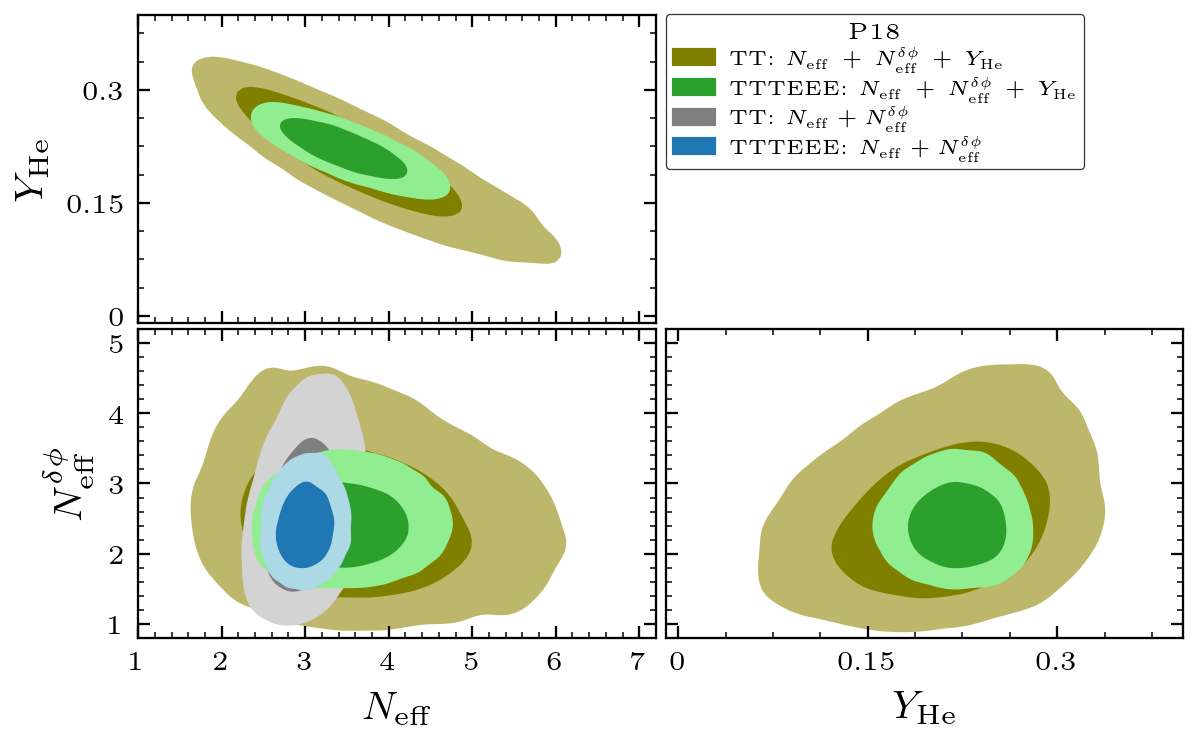

In [74]:
################################################
############       FIGURE 7 v2      ############
################################################

"""

Perturbation Based Template Analysis  for P18TT and P18TTTEEEE:

2D contours of:
    1) N^{\delta\phi}_{eff} vs N_{eff} (for fixed and varying YHe)
    2) N^{\delta\phi}_{eff} vs YH_e (only varying N_{eff})
    3) N_{eff} vs YH_e (only varying N^{\delta\phi}_{eff})

"""


fig1=plt.figure(figsize=(5,3),dpi=300)
gs1 = GridSpec(20,20,figure=fig1)
ax1 = fig1.add_subplot(gs1[1:10,1:10])
ax2 = fig1.add_subplot(gs1[10:19,1:10])
ax3 = fig1.add_subplot(gs1[10:19,10:19])

ax3.set_xlabel(r"$Y_{\rm{He}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax1.set_ylabel(r"$Y_{\rm{He}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax2.set_ylabel(r"$N^{\delta\phi}_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})
ax2.set_xlabel(r"$N_{\rm{eff}}$",fontdict={'fontsize':9.5,'family':'serif'})



ax1.fill(P18TT_ndphi_nur_yhe_2d_Nur_YHe_CLs[1][:,0],P18TT_ndphi_nur_yhe_2d_Nur_YHe_CLs[1][:,1],color=c_P18TT_ndX_nur_yhe[1],alpha=1)
ax1.fill(P18TT_ndphi_nur_yhe_2d_Nur_YHe_CLs[0][:,0],P18TT_ndphi_nur_yhe_2d_Nur_YHe_CLs[0][:,1],color=c_P18TT_ndX_nur_yhe[0],alpha=1)
ax1.fill(P18TTTEEE_ndphi_nur_yhe_2d_Nur_YHe_CLs[1][:,0],P18TTTEEE_ndphi_nur_yhe_2d_Nur_YHe_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur_yhe[1],alpha=1)
ax1.fill(P18TTTEEE_ndphi_nur_yhe_2d_Nur_YHe_CLs[0][:,0],P18TTTEEE_ndphi_nur_yhe_2d_Nur_YHe_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur_yhe[0],alpha=1)

ax2.fill(P18TT_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[1][:,0],P18TT_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[1][:,1],color=c_P18TT_ndX_nur_yhe[1],alpha=1)
ax2.fill(P18TT_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[0][:,0],P18TT_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[0][:,1],color=c_P18TT_ndX_nur_yhe[0],alpha=1)
ax2.fill(P18TT_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,0],P18TT_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,1],color=c_P18TT_ndX_nur[1],alpha=1)
ax2.fill(P18TT_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,0],P18TT_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,1],color=c_P18TT_ndX_nur[0],alpha=1)
ax2.fill(P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[1][:,0],P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur_yhe[1],alpha=1)
ax2.fill(P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[0][:,0],P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_Nur_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur_yhe[0],alpha=1)
ax2.fill(P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,0],P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[1][:,1],color=c_P18TTTEEE_ndX_nur[1],alpha=1)
ax2.fill(P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,0],P18TTTEEE_ndphi_nur_2d_Ndphi_Nur_CLs[0][:,1],color=c_P18TTTEEE_ndX_nur[0],alpha=1)

ax3.fill(P18TT_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[1][:,1],P18TT_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[1][:,0],color=c_P18TT_ndX_nur_yhe[1],alpha=1)
ax3.fill(P18TT_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[0][:,1],P18TT_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[0][:,0],color=c_P18TT_ndX_nur_yhe[0],alpha=1)
ax3.fill(P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[1][:,1],P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[1][:,0],color=c_P18TTTEEE_ndX_nur_yhe[1],alpha=1)
ax3.fill(P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[0][:,1],P18TTTEEE_ndphi_nur_yhe_2d_Ndphi_YHe_CLs[0][:,0],color=c_P18TTTEEE_ndX_nur_yhe[0],alpha=1)

#####################################
### Create Legend on fourth Axis: ###
#####################################

# Labels for the legend
labels_P18 = [r'TT: $N_{\rm{eff}}\,+\,N^{\delta\phi}_{\rm{eff}}\,+\,Y_{\rm{He}}$', r'TTTEEE: $N_{\rm{eff}}\,+\,N^{\delta\phi}_{\rm{eff}}\,+\,Y_{\rm{He}}$', r'TT: $N_{\rm{eff}}+N^{\delta\phi}_{\rm{eff}}$', r'TTTEEE: $N_{\rm{eff}}+N^{\delta\phi}_{\rm{eff}}$']

color_labels_P18 = [c_P18TT_ndX_nur_yhe[0], c_P18TTTEEE_ndX_nur_yhe[0], c_P18TT_ndX_nur[0],c_P18TTTEEE_ndX_nur[0]]

# Add fake plots to create the legend entries
for i in range(len(labels_P18)):
    ax3.fill(np.NaN, np.NaN,label=labels_P18[i], color=color_labels_P18[i])

# Create custom legends
handles_ax3, labels_ax3= ax3.get_legend_handles_labels()

# Create the combined legend
legend_ax3= ax3.legend(handles_ax3, labels_ax3, prop={'family':'serif','size':4.8},loc='upper right',bbox_to_anchor=(.82, 2.04),
    title='P18',title_fontsize=5.5,
    frameon=True,          # Display the legend frame
    framealpha=0.8,        # Transparency (0.0 to 1.0)
    facecolor='white', # Background color
    edgecolor='k'      # Border color
    )
legend_ax3.get_frame().set_linewidth(.3)


ax2.set_ylim(0.8,5.2)
ax3.set_ylim(.8,5.2)
ax2.set_xlim(1,7.2)
ax3.set_xlim(-0.01,0.4)
ax1.set_ylim(-0.01,0.4)
ax1.set_xlim(1,7.2)

ax1.tick_params(axis='both', which='major', labelsize=6.5)
ax1.tick_params(axis='both', which='minor', labelsize=6.5)
ax2.tick_params(axis='both', which='major', labelsize=6.5)
ax2.tick_params(axis='both', which='minor', labelsize=6.5)
ax3.tick_params(axis='both', which='major', labelsize=6.5)
ax3.tick_params(axis='both', which='minor', labelsize=6.5)

ax1.set_yticks([0,0.15,0.3])
ax1.set_yticklabels([0,0.15,0.3])
ax1.set_xticks([1,2,3,4,5,6,7])
ax1.set_xticklabels([])
ax2.set_xticks([1,2,3,4,5,6,7])
ax2.set_yticks([1,2,3,4,5])
ax2.set_yticklabels([1,2,3,4,5])
ax3.set_yticks([1,2,3,4,5])
ax3.set_yticklabels([])
ax3.set_xticks([0,0.15,0.3])
ax3.set_xticklabels([0,0.15,0.3])

plt.savefig(main_plots_dir+'Planck_Ndphi_Nur_YHe_CLs_pbt_v2.png',bbox_inches='tight')
plt.savefig(main_plots_dir+'Planck_Ndphi_Nur_YHe_CLs_pbt_v2.pdf',bbox_inches='tight')
plt.show()
plt.close()